<a href="https://colab.research.google.com/github/yusuffenes/GlobalAIHub_ML/blob/master/GlobalAIHub_ML_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importlarımızı projemize ekliyoruz ve hata mesajlarını ignore ediyoruz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_tree
import warnings
warnings.filterwarnings('ignore')

Datasetimizi df değişkenine atıyoruz ve ilk 15 satırını datasetini görmek için çağrıyoruz

In [4]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')
df.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


İlk bakışta görebildiğimiz kategorik verilerin bulunduğu ml için bunları ileride sayısala verilere dönüştürmemiz gerekiyor daha sonra bazı verilerin standart ya da farklı bir methot kullanılarak tekrar oluşturulabilir bu sayede ayrıkırı değerlerden bir nebze kurtuluruz ve performansı artırabiliriz.

Şimdi datasetinin hakkında daha da bilgi almak için info komutunu kullanalım.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Evet info komutundan çıkartabildiğimiz yorumlar veri setinde hiç nan değer bulunmuyor bu nedenle ekleme yada bir satırı çıkartmamıza şu anda ihtiyacımız yok

Şimdi kopyalanmış değerler varmı ona bakacağız eğer varsa veri setinden çıkartacağım

In [6]:
df.duplicated().sum()

3854

3854 adet kopya veri bulunuyor bunları veri setinden çıkartacağım.

In [7]:
df.drop_duplicates(inplace=True)

Şimdi ise describe ile veri setinde değerlerin nasıl dağıldığını gözlemleyeceğiz ve buna göre tekrar verileri değiştirmemiz gerekiyormu onu öğreneceğiz.

In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Çıkan tabloyu incelediğimizde değiştirmek yada değiştirmek bu veri seti için çok önemli değil ama yine de değiştrilebilir.

Şimdi ise obje türünde değerler için describe methodunu kullanıyoruz burada da benzersiz değerleri ve en çok tekrar eden değeri göreceğiz.

In [9]:
df.describe(include='object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


Şimdi bu benzersiz değerlerin ne kadar olduğunu yani dağılımlarına bakalım ve ne yapabileceğimiz düşenelim

In [10]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

Other değeri çok az olduğu için ayrı bir sayısal değer oluşturmak yerine direkt veri setinden çıkartalım.

In [11]:
df = df[df['gender'] != "other"]

In [12]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

* smoking history ye baktığımız da her benzersiz değer için ayrı ayrı bir sütün oluşturmak burada işimize yaramacaktır çünkü bu satırı sayısal değere dönüştürdükten sonra ben korelasyon oranına baktım ve korelasyon oranı düşük bir sütün bunun için de farklı farklı sütünlar oluşturmak sadece makineyi yoracaktır onun için burada Bilgimizin olmadıklarını(No info) 0 Sigara kullananları 1 ve kalan bütün benzersiz değerlide 2 olarak ayarlıyoruz.

* Cinsiyet için label encoder da kullanabilirdik yine aynı olay olacaktı ama böyle yapmak daha kolay olduğu için bunu kullanacağım.


In [13]:
df["gender"] = df["gender"].apply(lambda x: 0 if x == "Female" else 1 )
df["smoking_history"] = df["smoking_history"].apply(lambda x: 0 if x == "No Info" else 1 if x in ["former", "ever", "not current", "current"] else 2 )

Şimdi kategorisel sütünları sayısal değerlere dönüştürdüğümüz için artık bütün sütünların dağılımlarına bir bakalım ve ne çıkarımlar yapabiliyoruz görelim.

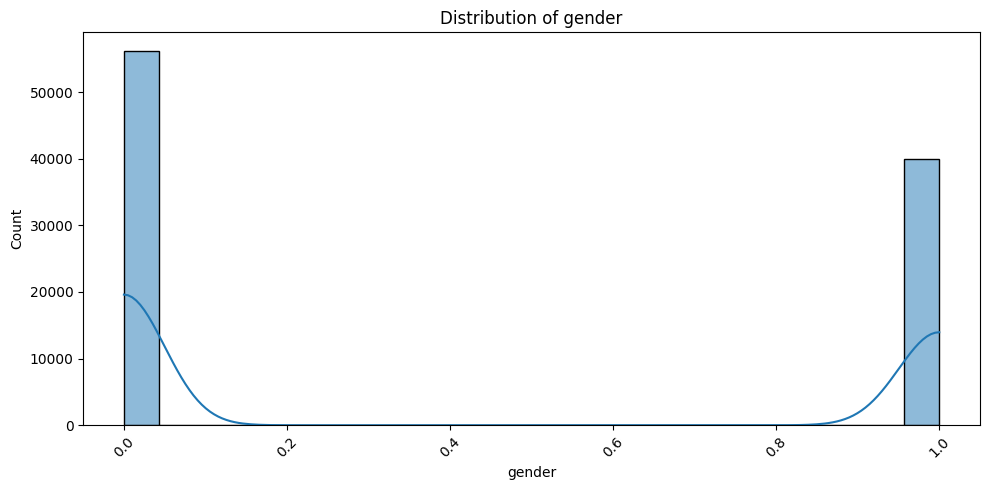

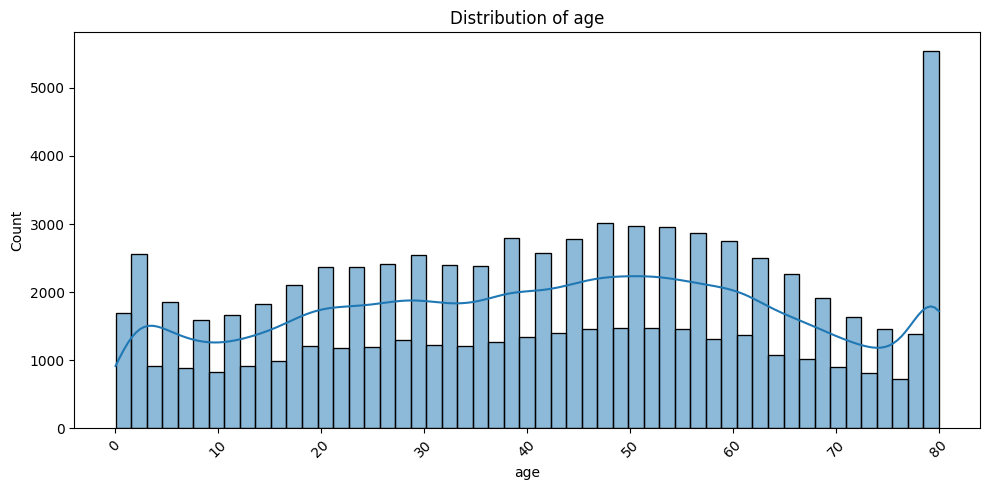

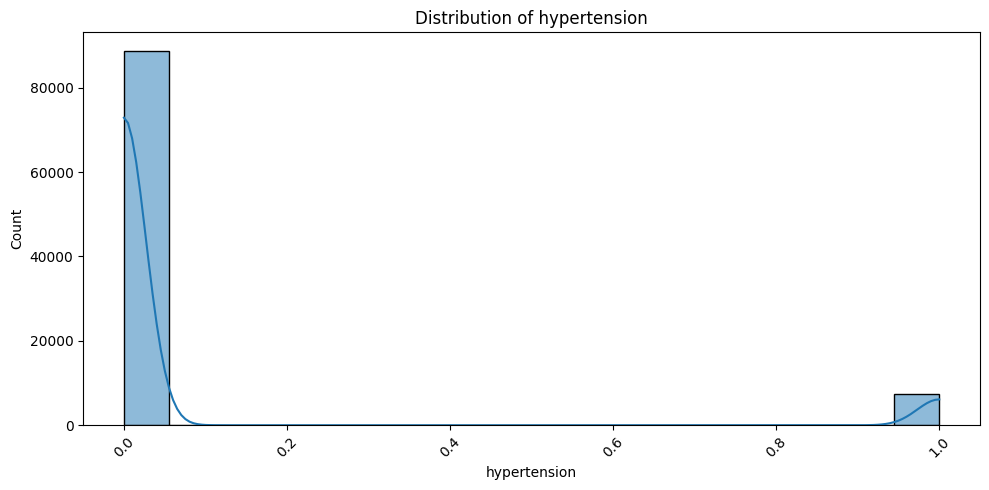

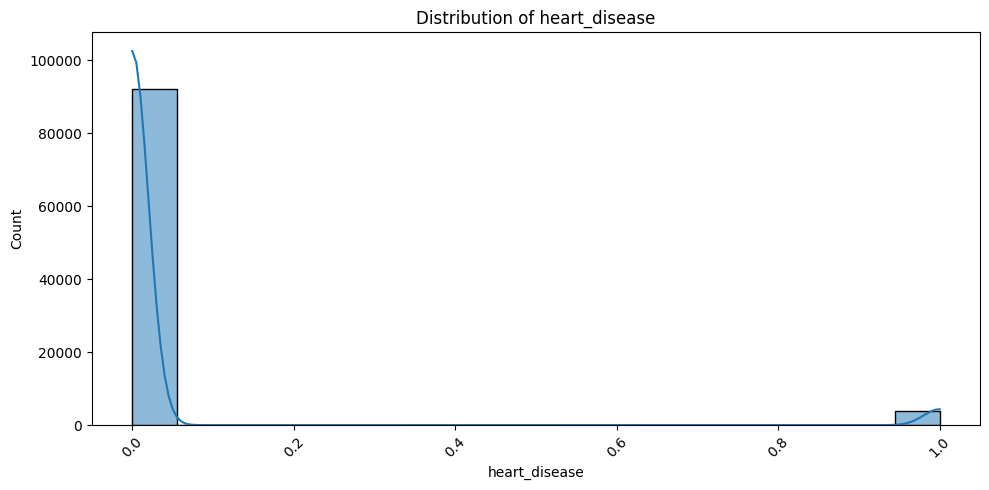

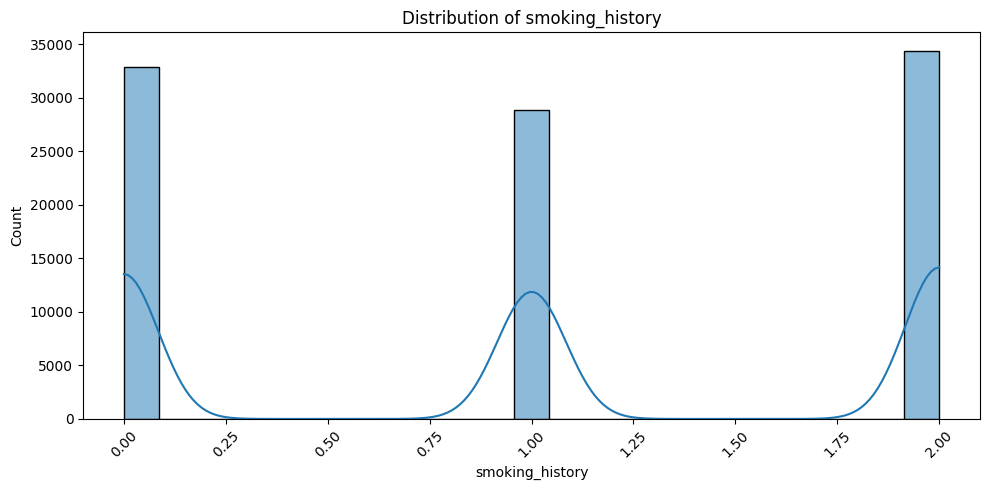

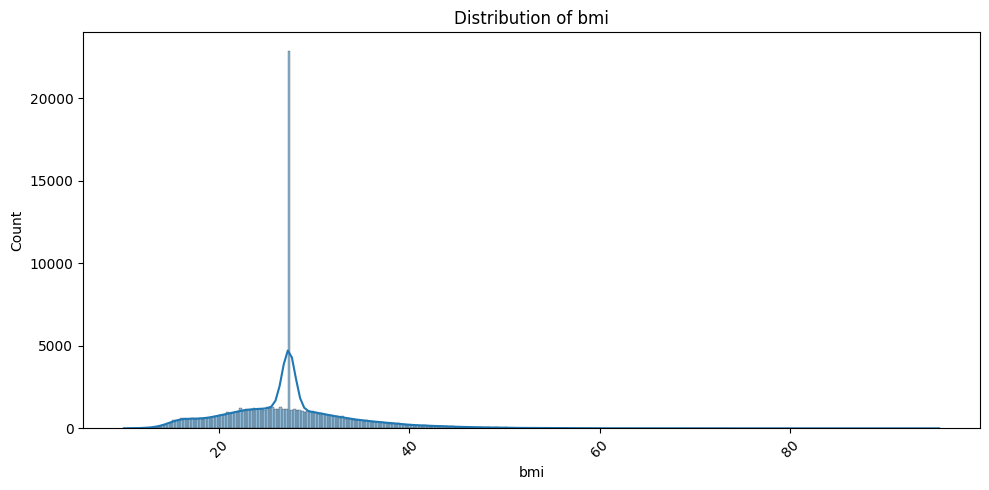

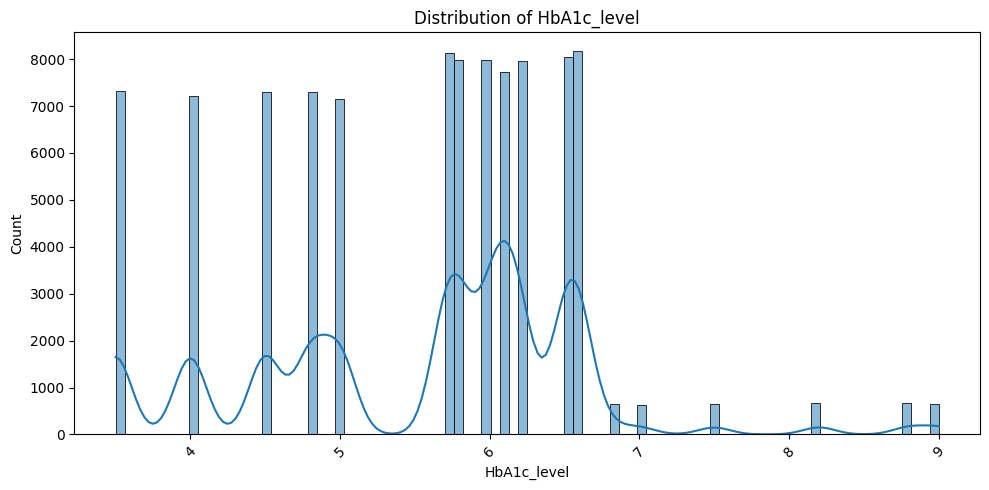

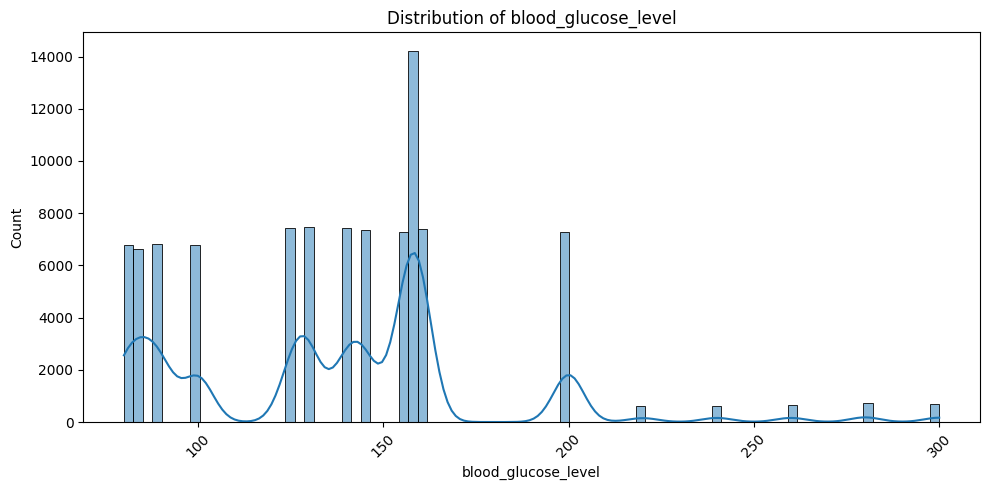

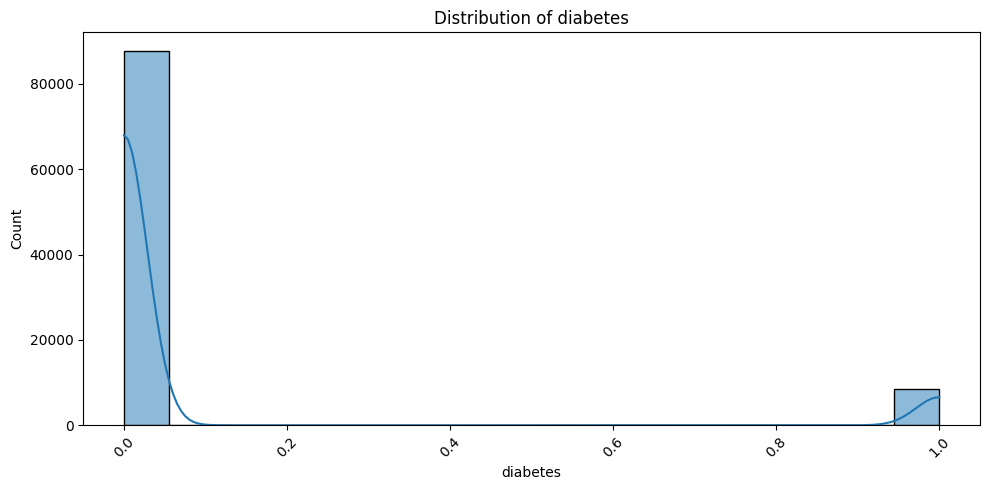

In [16]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    if df[column].dtype == 'object':
        sns.countplot(data=df, x=column)
    else:

        sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Şidmi ise Bazı sütünların dağılımlarının nasıl olduğuna bir bakalım bu dağılımlar ml için önemlidir aykırı değer fazla ise ml iyi bir sonuç çıkartamayabilir.

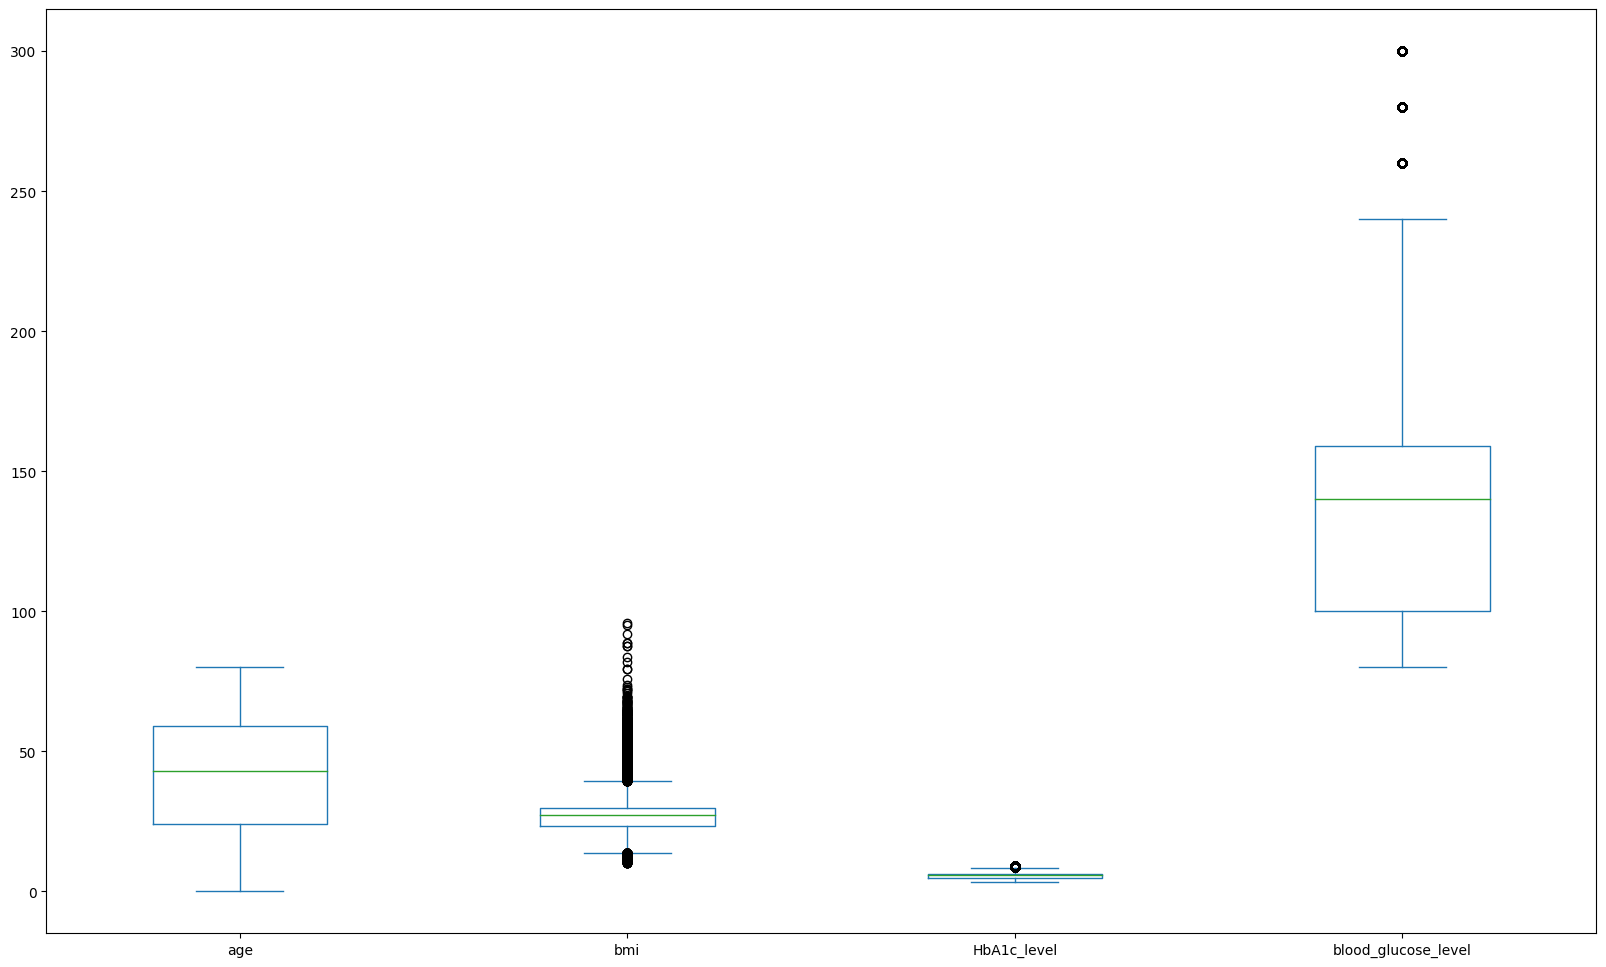

In [17]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].plot(kind='box', figsize=(20,12))
plt.show()

Vücüt kitle endeksinin dağılımını göz önünde bulundurarak bir model seçmemiz daha doğru olacaktır ya da bu sütünü düzenlemiz de gerekebilir.

Şimdi korelasyon oranlarını bakalım ve sütünların birbirleri araların da korelasyonuna bakalım

<Axes: >

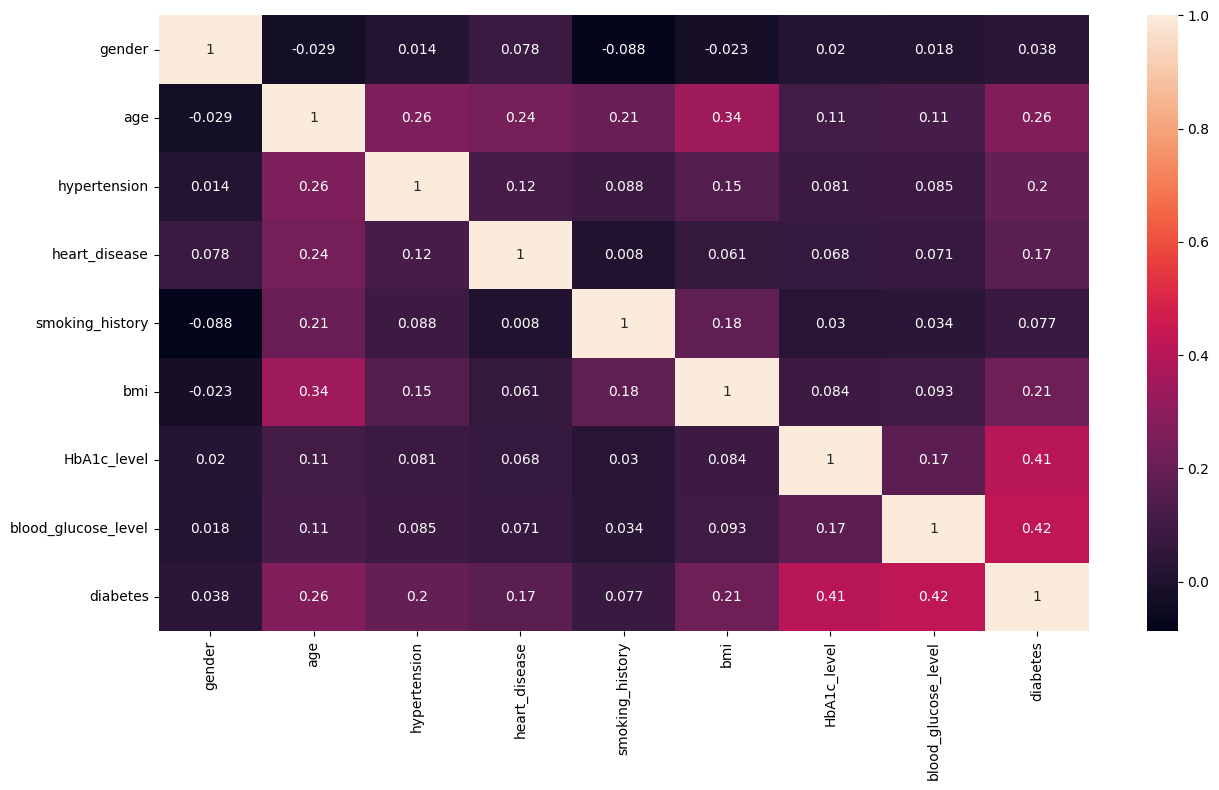

In [18]:
relations = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=relations, annot=True)

Evet görüldüğü gibi kandaki glikoz seviyesi ve diyabet oranı arasındaki korelasyon oldukça fazla bu nedenle bu sütünlar bizim için önemli sütünlar oluyor. ama cinsiyeti ile diyabet arasında ilişki az olduğu için bu sütünü çıkartmak bizim için daha iyi olabilir (olabilir diyorum çünkü tam olarak bilemeyiz ikisinide deneyip hangisini  iyi olduğuna öyle karar vermek daha iyi olacaktır.)

In [19]:
df = df.drop('gender',axis=1)

Şimdi ise değerleri birbirlerinden daha uzak olanları standard scaler ile dönüştürelim.

In [20]:
ss=StandardScaler()
df[['age','blood_glucose_level','bmi']] = ss.fit_transform(df[['age','blood_glucose_level','bmi']])

Şimdi x ve y değerlerimizi oluşturalım ve bu değerlere göre train test olarak bunları ayıralım train_size değerenin kaç olacağınıda denemeler ile bulabiliriz ama ben eğer 30000-40000 değer veya fazlası varsa 0.85 ya da üst bir değer kullanıyorum ama kesin bir şey yoktur bunun için o yüzden de sağlam olsun diye çapraz doğrulamayı da kullanıyorum.

In [21]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

Şimdi her denediğimiz model için tekrar tekrar aynı kodları yazmak yerine iki adet fonksiyon tanımlayarak bunun daha kolay ve tek bir çıkta da birden fazla model için sonuçları okuyabiliyoruz.
* model_evulation fonksiyonun da kullanılan modelin ne kadar başarılı olduğu karmaşıklık matrisini ve sınıflandırma hatalarının ne kadar olduğuna bakıyoruz.
* fit_model fonksiyonun da ise kullanıcının isteklerine göre modeli eğitiyoruz modelleri dictionary içinde tutuyoruz eklemek istersek oradan ekliyoruz eğer kullanıcı çapraz doğrulama isterse onu da dahil ediyoruz.

In [22]:
def model_evaluation(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm_matrix, annot=True,fmt='d', cmap='Blues')
    TP = cm[0,0]
    TN = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    print('Accuracy : ', (TP+TN)/(TP+TN+FP+FN))
    print('Classification Error : ',(FP + FN) / float(TP + TN + FP + FN),"\n" )
    plt.show()
    print("\n","\n")

def fit_model(models,cross_val=False,cv_val=4):
    for i in models:
        model = models[i]
        model.fit(X_train, y_train)
        print(i,"\n")
        model_evaluation(model)
        if cross_val:
          cv = cross_val_score(model, X, y, cv=cv_val)
          print("Cross Validation : ",cv)
          print("Cross Validation Score : ", np.mean(cv))
          print("\n","\n")


Bu kısımda ise hangi modelleri kullanmak istiyorsak onları ekliyoruz ve fonksiyonumzu çağırıyoruz ben sonuçlara çapraz doğrulamanın da dahil olamasını istedim.

Logistic Regression 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8748
           1       0.86      0.63      0.72       867

    accuracy                           0.96      9615
   macro avg       0.91      0.81      0.85      9615
weighted avg       0.95      0.96      0.95      9615

Accuracy :  0.9568382735309412
Classification Error :  0.04316172646905876 



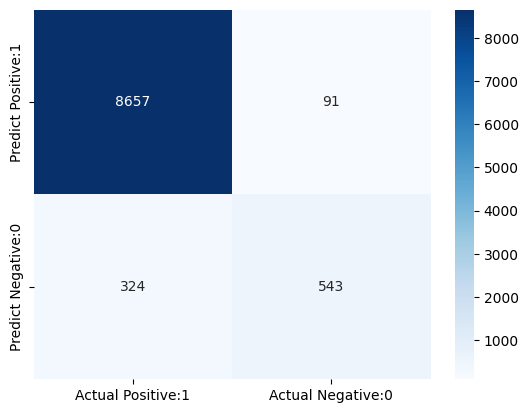


 

Cross Validation :  [0.95972875 0.95956234 0.95806291 0.95839574]
Cross Validation Score :  0.9589374345659334

 

Random Forest 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8748
           1       0.93      0.70      0.80       867

    accuracy                           0.97      9615
   macro avg       0.95      0.85      0.89      9615
weighted avg       0.97      0.97      0.97      9615

Accuracy :  0.9681747269890796
Classification Error :  0.03182527301092044 



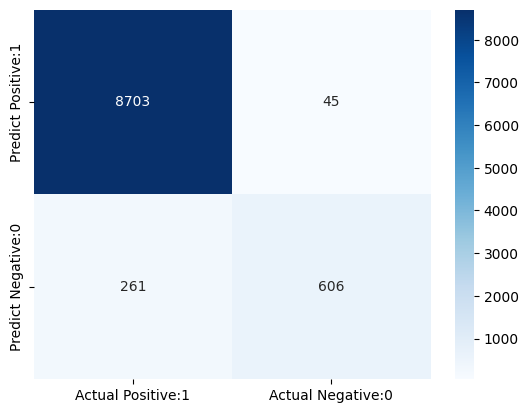


 

Cross Validation :  [0.96825727 0.96746682 0.9677983  0.96804793]
Cross Validation Score :  0.9678925806697034

 

Decision Tree 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8748
           1       0.72      0.74      0.73       867

    accuracy                           0.95      9615
   macro avg       0.85      0.86      0.85      9615
weighted avg       0.95      0.95      0.95      9615

Accuracy :  0.9507020280811233
Classification Error :  0.049297971918876755 



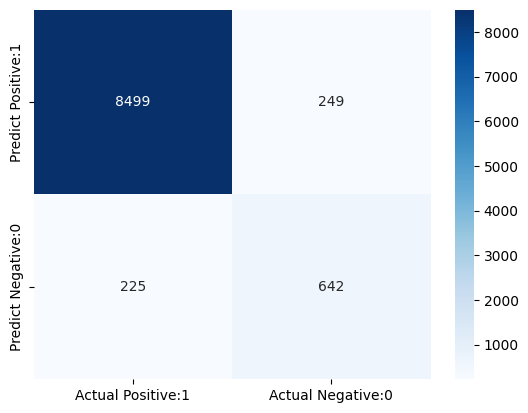


 

Cross Validation :  [0.95115863 0.94957773 0.94786986 0.95069895]
Cross Validation Score :  0.9498262945543687

 

KNN 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8748
           1       0.91      0.64      0.75       867

    accuracy                           0.96      9615
   macro avg       0.94      0.82      0.87      9615
weighted avg       0.96      0.96      0.96      9615

Accuracy :  0.9618304732189288
Classification Error :  0.038169526781071245 



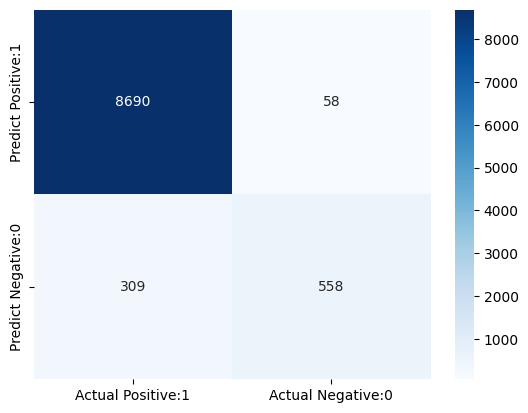


 

Cross Validation :  [0.96243292 0.96297375 0.96101681 0.9618905 ]
Cross Validation Score :  0.96207849260833

 

XGBoost 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8748
           1       0.96      0.70      0.81       867

    accuracy                           0.97      9615
   macro avg       0.97      0.85      0.90      9615
weighted avg       0.97      0.97      0.97      9615

Accuracy :  0.9703588143525741
Classification Error :  0.029641185647425898 



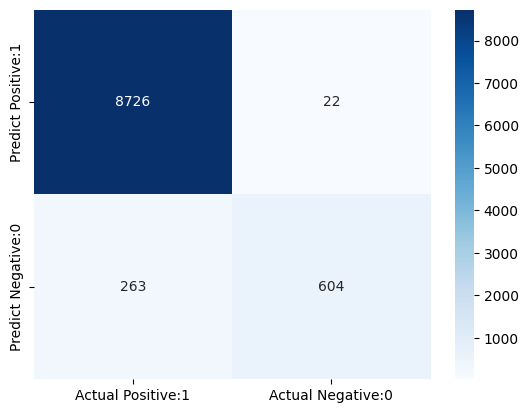


 

Cross Validation :  [0.97050381 0.97058701 0.97000333 0.97091862]
Cross Validation Score :  0.9705031921823689

 

Ada Boost Classifier 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8748
           1       0.99      0.69      0.81       867

    accuracy                           0.97      9615
   macro avg       0.98      0.84      0.90      9615
weighted avg       0.97      0.97      0.97      9615

Accuracy :  0.9709828393135725
Classification Error :  0.029017160686427457 



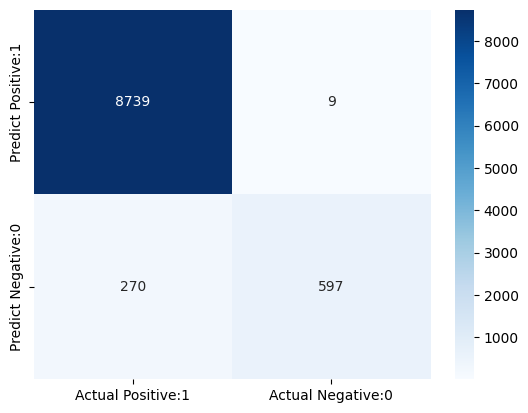


 

Cross Validation :  [0.97104464 0.97071182 0.97062739 0.97129306]
Cross Validation Score :  0.9709192278617615

 

Gradient Boosting Classifier 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8748
           1       0.99      0.69      0.81       867

    accuracy                           0.97      9615
   macro avg       0.98      0.84      0.90      9615
weighted avg       0.97      0.97      0.97      9615

Accuracy :  0.9709828393135725
Classification Error :  0.029017160686427457 



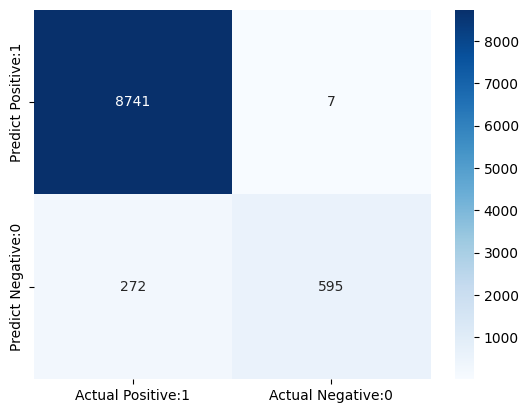


 

Cross Validation :  [0.97133586 0.97071182 0.97100183 0.97096023]
Cross Validation Score :  0.9710024333533398

 

Bagging Classifier 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8748
           1       0.89      0.71      0.79       867

    accuracy                           0.97      9615
   macro avg       0.93      0.85      0.89      9615
weighted avg       0.96      0.97      0.96      9615

Accuracy :  0.9659906396255851
Classification Error :  0.034009360374414974 



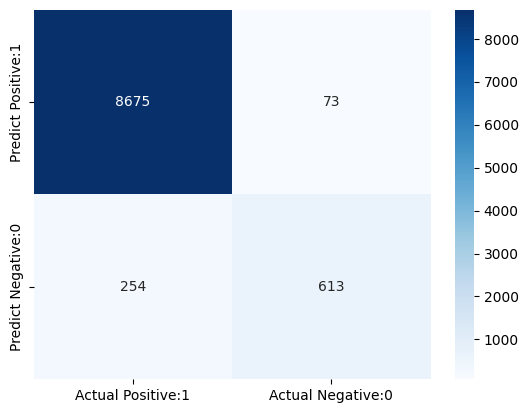


 

Cross Validation :  [0.96680118 0.96592753 0.96613413 0.96600932]
Cross Validation Score :  0.9662180403487487

 



In [23]:
xgb_model = xgb.XGBClassifier()

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb_model,
    'Ada Boost Classifier' : AdaBoostClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'Bagging Classifier' : BaggingClassifier(),

}


fit_model(models,cross_val=True)


Evet çıktılarımıza göre en iyi sonuçları verenler XGB , ADA BOOST , VE GRADIENT BOOSTING gibi görünüyor bunlar için hiper parametre optimizasyonu ile daha iyi bir değer çıkartabilir miyiz diye bakçağız ayrıca sonuclara baktığımızda diyabet olmayanlar için nerdeyse %100 bir değer verirken diaybet olanlar için bu değer daha düşük durumda bu durum bizim diaybet olmayanlar için verilerimizin azlığından ya da verilen train in dağılımlarından bile olabilir bu nedenle bunun için eğer bu değer çok daha düşük olur ise train ve test lerimize özel olarak ayarlamalar yapmak gerekebilir şimdilik bizim için 70 değeri çok kötü bir değer değil f1 skoruda biraz kurtarıyor tabiki.

Ben hiper parametre optimizasyonu için RandomizedSearchCV kullanacağım bunun diğer yöntemlerden farkı hiper parametreleri rastgele olarak seçer ve diğer yöntemlerin en iyi sonuçlarıyla aynı sonuçu çıkartır ve bizi tek tek parametre ayarlamadan kurtarır. Bu işlem sürer çünkü 500 adet model çalışır ve bunu çapraz doğrulama ile yapar bu nedenle süreler datasetine ve datesetinin ne kadar iyi ml için hazırlandığına göre değişken süreler ortaya çıkar.

In [ ]:
xgb_params = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 5]
}
xgb_model = xgb.XGBClassifier()

xgb_randomcv_model = RandomizedSearchCV(estimator=xgb_model,
                                       param_distributions=xgb_params,
                                       n_iter=100,
                                       cv=5,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       verbose=2).fit(X_train, y_train)


print('En iyi parametreler:', xgb_randomcv_model.best_params_)
print('En iyi accuracy score:', xgb_randomcv_model.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
En iyi parametreler: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
En iyi accuracy score: 0.9710970553181951


Görüldüğü gibi XGB için en iyi parametreleri bizim için çıkardı

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8748
           1       0.99      0.69      0.81       867

    accuracy                           0.97      9615
   macro avg       0.98      0.84      0.90      9615
weighted avg       0.97      0.97      0.97      9615

Accuracy :  0.9706708268330734
Classification Error :  0.029329173166926677 



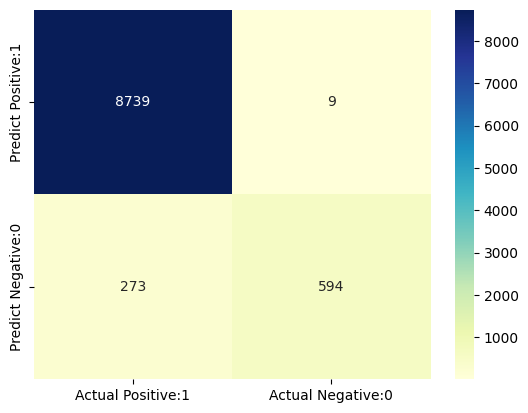


 

0.9713859772798188


0.9706708268330734

In [ ]:
model_evaluation(xgb_randomcv_model)
print(xgb_randomcv_model.score(X_train,y_train))
xgb_randomcv_model.score(X_test,y_test)

burada yukarı yaptığımızn aynısı yapıyoruz sadece son kısımda aşırı besleme mevcutmu diye bakıyoruz aşırı besleme burada bulunmuyor.

Burada da ağacın şemasını çıkartıyoruz.

<Axes: >

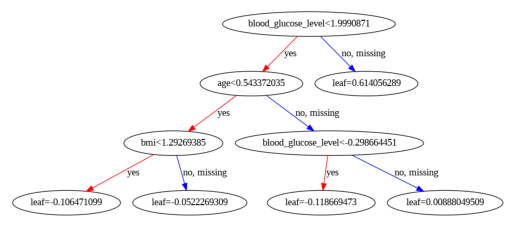

In [ ]:
plot_tree(xgb_randomcv_model.best_estimator_, num_trees=0)

Şimdi aynı işlemi Gradient Boost için yapacağım.

In [20]:
gb_params = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

gb_model = GradientBoostingClassifier()

gb_randomcv_model = RandomizedSearchCV(estimator=gb_model,
                                       param_distributions=gb_params,
                                       n_iter=100,
                                       cv=5,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       verbose=2).fit(X_train, y_train)

print('En iyi parametreler:', gb_randomcv_model.best_params_)
print('En iyi accuracy score:', gb_randomcv_model.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
En iyi parametreler: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1}
En iyi accuracy score: 0.971201066823571


Görüldüğü gibi default parametrelerle çıkan sonuçtan biraz daha iyi bir sonuç verdi ben artık burada farklı model denemeyi ya da hiper parametre optimizasyonu yapmayı bırakıyorum 0.97 den yukarıya çıkabileceğimi model değiştirerek ya da parametreleri değiştirerrek aşabileceğimi sanmıyorum şimdi bu değerlerin hatalarına ve karmaşıklık matrislerine f1 skorlarına bakkalım.

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8748
           1       0.99      0.69      0.81       867

    accuracy                           0.97      9615
   macro avg       0.98      0.85      0.90      9615
weighted avg       0.97      0.97      0.97      9615

Accuracy :  0.9713988559542381
Classification Error :  0.02860114404576183 



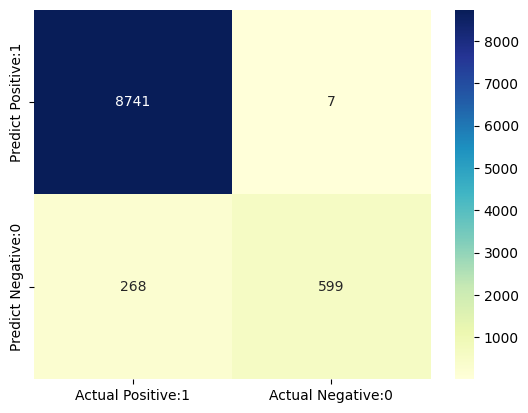

In [23]:
model_evaluation(gb_randomcv_model)

En son olarak hataları çıkartalım ve projeyi bitirelim.

In [29]:
gb_randomcv_y_pred = gb_randomcv_model.predict(X_test)
print("Errors")
print("MAE : ",mean_absolute_error(y_test, gb_randomcv_y_pred))
print("MAPE : ",mean_absolute_percentage_error(y_test, gb_randomcv_y_pred))
print("MSE : ",mean_squared_error(y_test, gb_randomcv_y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, gb_randomcv_y_pred)))

Errors
MAE :  0.02860114404576183
MAPE :  3278751678792.9004
MSE :  0.02860114404576183
RMSE :  0.16911872766125527
